In [1]:
# IMPORT PACKAGES FOR PROJECT

# !pip install wordcloud, pandas, matplotlib, PIL
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
# Define Function to calculate the number of days in a year
def days_in_year(year):
    if year % 4 == 0:
        if year % 100 == 0:
            if year % 400 == 0:
                return 366
            else:
                return 365
        else:
            return 366
    else:
        return 365

In [3]:
# Define function to extract text befor delimiter
def extract_delim(names):
    results = []
    delimiters = {':', ';', '!', '.'}
    for name in names:
        for delimiter in delimiters:
            if delimiter in name:
                result = name.split(delimiter, 1)[0].strip()
                results.append(result)
                break
        else:
            results.append(name)
    return results

In [4]:
# define function to get book summary
def get_book_summaries(book_titles):
    summaries = []
    for book_title in book_titles:
        try:
            # Amazon
            amazon_url = f"https://www.amazon.com/s?k={book_title}"
            response = requests.get(amazon_url)
            soup = BeautifulSoup(response.content, 'html.parser')
            search_results = soup.find_all('div', {'data-component-type': 's-search-result'})
            if len(search_results) == 0:
                amazon_summary = f"No results found for '{book_title}' on Amazon."
            else:
                top_result = search_results[0]
                book_url = "https://www.amazon.com" + top_result.find('a', {'class': 'a-link-normal'})['href']
                response = requests.get(book_url)
                soup = BeautifulSoup(response.content, 'html.parser')
                amazon_summary = soup.find('div', {'id': 'bookDescription_feature_div'}).find('noscript').get_text().strip()
        except:
            amazon_summary = f"Error getting summary for '{book_title}' on Amazon."

        try:
            # Wikipedia
            wikipedia_url = f"https://en.wikipedia.org/wiki/{book_title.replace(' ', '_')}"
            response = requests.get(wikipedia_url)
            soup = BeautifulSoup(response.content, 'html.parser')
            wikipedia_summary = soup.find('div', {'class': 'mw-parser-output'}).find_all('p')[0].get_text().strip()
        except:
            wikipedia_summary = f"Error getting summary for '{book_title}' on Wikipedia."

        try:
            # Goodreads
            goodreads_url = f"https://www.goodreads.com/search?q={book_title}"
            response = requests.get(goodreads_url)
            soup = BeautifulSoup(response.content, 'html.parser')
            search_results = soup.find_all('tr', {'itemtype': 'http://schema.org/Book'})
            if len(search_results) == 0:
                goodreads_summary = f"No results found for '{book_title}' on Goodreads."
            else:
                top_result = search_results[0]
                book_url = top_result.find('a', {'class': 'bookTitle'})['href']
                response = requests.get(book_url)
                soup = BeautifulSoup(response.content, 'html.parser')
                goodreads_summary = soup.find('div', {'id': 'description'}).find_all('span')[1].get_text().strip()
        except:
            goodreads_summary = f"Error getting summary for '{book_title}' on Goodreads."

        summaries.append({
            'book_title': book_title,
            'Amazon': amazon_summary,
            'Wikipedia': wikipedia_summary,
            'Goodreads': goodreads_summary
        })

    return summaries

In [5]:
book_list2021 = {1:{'Name':"The richest man in Babylon", 'Author':"George S. Clason", 'Pages':224, 'Format': "Print"}
                 , 2:{'Name':"The slight edge: Turning simple disciplines into massive success & happiness", 'Author':"Jeff Olson", 'Pages':280, 'Format': "Print"}
                 , 3:{'Name':"Intermittent fasting basics: Your guide to the essentials of intermittent fasting - and how it can work for you!", 'Author':"Lindsay Boyers", 'Pages':219, 'Format': "Print"}
                 , 4:{'Name':"The one thing: The surprisingly simple truth behind extraordinary results", 'Author':"Gary Keller", 'Pages':240, 'Format': "Print"}
                 , 5:{'Name':"Who moved my cheese: An A-Mazing way to deal with change in your work and in your life", 'Author':"Spencer Johnson", 'Pages':94, 'Format': "Print"}
                 , 6:{'Name':"Think and grow rich", 'Author':"Napoleon Hill", 'Pages':290, 'Format': "Ebook"}
                 , 7:{'Name':"Outwitting the devil: The secret to freedom and success", 'Author':"Napoleon Hill", 'Pages':302, 'Format': "Ebook"}
                 , 8:{'Name':"The four agreements: a practical guide to personal freedom", 'Author':"Don Miquel Ruiz", 'Pages':140, 'Format': "Print"}
                 , 9:{'Name':"Atomic habits: an easy and proven way to build good habits and break bad ones", 'Author':"James Clear", 'Pages':298, 'Format': "Print"}
                 , 10:{'Name':"How to win friends and influence people", 'Author':"Dale Carnegie", 'Pages':250, 'Format': "Print"}
                 , 11:{'Name':"Trading in the zone: master the market with confidence, discipline and a winning attitude", 'Author':"Mark Douglas", 'Pages':207, 'Format': "Print"}
                 , 12:{'Name':"Stone soup", 'Author':"Marcia Brown", 'Pages':52, 'Format': "Print"}
                 , 13:{'Name':"Rich dad's cashflow quadrant: Guide to financial freedom", 'Author':"Robert T. Kiyosaki", 'Pages':282, 'Format': "Ebook"}
                 , 14:{'Name':"A beginners guide to the stock market", 'Author':"Mathew R. Kratter", 'Pages':100, 'Format': "Ebook"}
                 , 15:{'Name':"Credit spread options for beginners: turn your most boring stocks into reliable monthly paychecks using call, put & iron butterfly spreads - even if the market is doing nothing", 'Author':"Freeman Publications", 'Pages':134, 'Format': "Ebook"}
                 , 16:{'Name':"Heart sick: Connecting the dots between hope, disappointment and healing", 'Author':"Conscious Core", 'Pages':107, 'Format': "Ebook"}
                 , 17:{'Name':"Thinking strategically: the competitive edge in business, politics and everyday life", 'Author':"Avinash K. Dixit & " "Barry J. Nalebuff", 'Pages':384, 'Format': "Ebook"}
                 , 18:{'Name':"Noise trading and illusory corrections in the US equity markets", 'Author':"Jennifer C. Bender & " "Carol L. Osler & " "David Simon", 'Pages':47, 'Format': "Research Paper"}
                }

In [6]:
BL21 = pd.DataFrame(book_list2021).transpose()
BL21

,Name,Author,Pages,Format
1,The richest man in Babylon,George S. Clason,224,Print
2,The slight edge: Turning simple disciplines in...,Jeff Olson,280,Print
3,Intermittent fasting basics: Your guide to the...,Lindsay Boyers,219,Print
4,The one thing: The surprisingly simple truth b...,Gary Keller,240,Print
5,Who moved my cheese: An A-Mazing way to deal w...,Spencer Johnson,94,Print
6,Think and grow rich,Napoleon Hill,290,Ebook
7,Outwitting the devil: The secret to freedom an...,Napoleon Hill,302,Ebook
8,The four agreements: a practical guide to pers...,Don Miquel Ruiz,140,Print
9,Atomic habits: an easy and proven way to build...,James Clear,298,Print
10,How to win friends and influence people,Dale Carnegie,250,Print


In [7]:
sum21 = pd.DataFrame(get_book_summaries(extract_delim(BL21['Name'])))

# show title with summaries
sum21.reset_index(drop=True, inplace=True)
sum21.style.set_properties(**{'text-align': 'left'}, inplace=True)
sum21

,book_title,Amazon,Wikipedia,Goodreads
0,The richest man in Babylon,No results found for 'The richest man in Babyl...,Other reasons this message may be displayed:,Error getting summary for 'The richest man in ...
1,The slight edge,No results found for 'The slight edge' on Amazon.,Other reasons this message may be displayed:,Error getting summary for 'The slight edge' on...
2,Intermittent fasting basics,No results found for 'Intermittent fasting bas...,Other reasons this message may be displayed:,Error getting summary for 'Intermittent fastin...
3,The one thing,No results found for 'The one thing' on Amazon.,Other reasons this message may be displayed:,Error getting summary for 'The one thing' on G...
4,Who moved my cheese,No results found for 'Who moved my cheese' on ...,Who Moved My Cheese? An Amazing Way to Deal wi...,Error getting summary for 'Who moved my cheese...
5,Think and grow rich,No results found for 'Think and grow rich' on ...,Think and Grow Rich is a book written by Napol...,Error getting summary for 'Think and grow rich...
6,Outwitting the devil,No results found for 'Outwitting the devil' on...,Other reasons this message may be displayed:,Error getting summary for 'Outwitting the devi...
7,The four agreements,No results found for 'The four agreements' on ...,Other reasons this message may be displayed:,Error getting summary for 'The four agreements...
8,Atomic habits,No results found for 'Atomic habits' on Amazon.,Other reasons this message may be displayed:,Error getting summary for 'Atomic habits' on G...
9,How to win friends and influence people,No results found for 'How to win friends and i...,,Error getting summary for 'How to win friends ...


In [8]:
pages_read21 = BL21['Pages'].sum()
print(f"Number of books read in 2021: \t\t\t\t {BL21['Name'].count()} books")
print(f"Number of pages read in 2021: \t\t\t\t {format(pages_read21, ',d')} pages")
print(f"Average number of pages read per month in 2021: \t {round(pages_read21/12)} pages")
print(f"Average number of pages read per day in 2021: \t\t {round(pages_read21/days_in_year(2021))} pages")

Number of books read in 2021: 				 18 books
Number of pages read in 2021: 				 3,650 pages
Average number of pages read per month in 2021: 	 304 pages
Average number of pages read per day in 2021: 		 10 pages


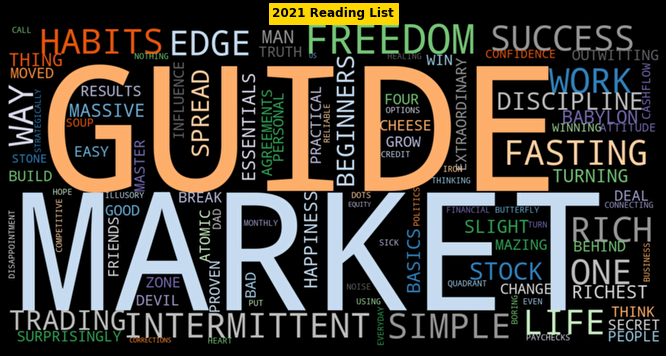

In [9]:
word_string=""

for book in BL21['Name']:
     word_string += book.upper() + " "

word_cloud = WordCloud(
     background_color='black'
                       , scale=3, collocations=True
                       , colormap='tab20c'
                       , normalize_plurals=True
                       ).generate(word_string)

plt.figure(figsize = (20,6), facecolor = 'black')
plt.imshow(word_cloud, interpolation = 'bessel')
plt.axis('off')
plt.title("2021 Reading List", fontweight='bold', color='black', backgroundcolor='gold')

plt.show()

In [10]:
book_list2022 = {1:{'Name':"The subtle art of not giving a F*ck: A counterintuitive approach to living a good life", 'Author':"Mark Manson", 'Pages':206, 'Format': "Ebook"}
                 , 2:{'Name':"Why we sleep; unlocking the power of sleep and dreams", 'Author':"Mathew Walker", 'Pages':323, 'Format': "Ebook"}
                 , 3:{'Name':"Ingredients: the strange chemistry of what we put in and on us", 'Author':"Goerge Zaidan", 'Pages':299, 'Format': "Print"}
                 , 4:{'Name':"We should all be millionaires: A woman's guide to earning more, building wealth, and gaining economic power", 'Author':"Rachel Rodgers", 'Pages':276, 'Format': "Ebook"}
                 , 5:{'Name':"The five love languages: The secret to love that lasts", 'Author':"Gary Chapman", 'Pages':272, 'Format': "Audiobook"}
                 , 6:{'Name':"The art of saying NO: How to stand your ground, reclain your time and energy, and refuse to be taken for granted (Without feeling guilty)", 'Author':"Damon Zahariades", 'Pages':160, 'Format': "Ebook"}
                 , 7:{'Name':"If you had controlling parents: How to make peace with your past and take your place in the world", 'Author':"Dan Neuharth", 'Pages':274, 'Format': "Ebook"}
                 , 8:{'Name':"Abundance beyond trauma: Discovering the courage for change and commitment to yourself", 'Author':"Jeannine L. Rashidi", 'Pages':169, 'Format': "Ebook"}
                 , 9:{'Name':"Dear Girl, A celebration of wonderful, smart and beautiful you!", 'Author':"Amy Krouse Rosenthal & " "Paris Rosenthal", 'Pages':40, 'Format': "Print"}
                }

In [11]:
BL22 = pd.DataFrame(book_list2022).transpose()
BL22

,Name,Author,Pages,Format
1,The subtle art of not giving a F*ck: A counter...,Mark Manson,206,Ebook
2,Why we sleep; unlocking the power of sleep and...,Mathew Walker,323,Ebook
3,Ingredients: the strange chemistry of what we ...,Goerge Zaidan,299,Print
4,We should all be millionaires: A woman's guide...,Rachel Rodgers,276,Ebook
5,The five love languages: The secret to love th...,Gary Chapman,272,Audiobook
6,The art of saying NO: How to stand your ground...,Damon Zahariades,160,Ebook
7,If you had controlling parents: How to make pe...,Dan Neuharth,274,Ebook
8,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook
9,"Dear Girl, A celebration of wonderful, smart a...",Amy Krouse Rosenthal & Paris Rosenthal,40,Print


In [12]:
sum22 = pd.DataFrame(get_book_summaries(extract_delim(BL22['Name'])))

# show title with summaries
sum22.reset_index(drop=True, inplace=True)
sum22.style.set_properties(**{'text-align': 'left'}, inplace=True)
sum22

,book_title,Amazon,Wikipedia,Goodreads
0,The subtle art of not giving a F*ck,No results found for 'The subtle art of not gi...,Other reasons this message may be displayed:,Error getting summary for 'The subtle art of n...
1,Why we sleep,No results found for 'Why we sleep' on Amazon.,Other reasons this message may be displayed:,Error getting summary for 'Why we sleep' on Go...
2,Ingredients,No results found for 'Ingredients' on Amazon.,An ingredient is a substance that forms part o...,Error getting summary for 'Ingredients' on Goo...
3,We should all be millionaires,No results found for 'We should all be million...,Other reasons this message may be displayed:,Error getting summary for 'We should all be mi...
4,The five love languages,No results found for 'The five love languages'...,Other reasons this message may be displayed:,Error getting summary for 'The five love langu...
5,The art of saying NO,No results found for 'The art of saying NO' on...,Other reasons this message may be displayed:,Error getting summary for 'The art of saying N...
6,If you had controlling parents,No results found for 'If you had controlling p...,Other reasons this message may be displayed:,Error getting summary for 'If you had controll...
7,Abundance beyond trauma,No results found for 'Abundance beyond trauma'...,Other reasons this message may be displayed:,Error getting summary for 'Abundance beyond tr...
8,"Dear Girl, A celebration of wonderful, smart a...","No results found for 'Dear Girl, A celebration...",Other reasons this message may be displayed:,"No results found for 'Dear Girl, A celebration..."


In [13]:
pages_read22 = BL22['Pages'].sum()
print(f"Number of books read in 2022: \t\t\t\t {BL22['Name'].count()} books")
print(f"Number of pages read in 2022: \t\t\t\t {format(pages_read22, ',d')} pages")
print(f"Average number of pages read per month in 2022: \t {round(pages_read22/12)} pages")
print(f"Average number of pages read per day in 2022: \t\t {round(pages_read22/days_in_year(2022))} pages")

Number of books read in 2022: 				 9 books
Number of pages read in 2022: 				 2,019 pages
Average number of pages read per month in 2022: 	 168 pages
Average number of pages read per day in 2022: 		 6 pages


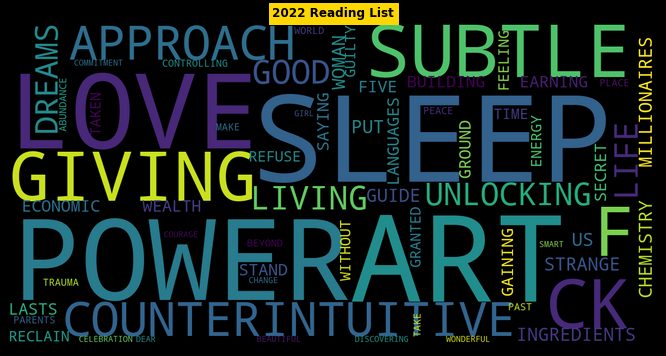

In [14]:
word_string=""

for book in BL22['Name']:
     word_string += book.upper() + " "

word_cloud = WordCloud(background_color='black',scale=3, normalize_plurals = True).generate_from_text(word_string)

plt.figure(figsize = (20,6), facecolor='black')
plt.imshow(word_cloud, interpolation = 'spline36')
plt.axis('off')
plt.title("2022 Reading List", fontweight='bold', color='black', backgroundcolor='gold')

plt.show()

In [15]:
book_list2023 = {"Name":
    ["The 7 habits of highly effective people: Powerful lessons in personal change"
     ,"Why your weirdness is wonderful: Embrace your quirks and live your strengths"
     ,"Be Quiet! (Mother Bruce Book 3)"
     ,"Red Riding Hood"
     ,"Storytelling with data: A visualization guide for business professionals"
     ,"Learning SQL: Generating, Manipulating and Retrieving Data" 
    ,"Resonate: Present visual stories that transform audiences"
    , "Deep Work: Rules for focused success in a distracted world"
    , "The great gatsby"]
                 , "Author":
    ["Stephen R. Covey"
    ,"Laurie Wallin"
    ,"Ryan T. Higgins"
    ,"Lydia L. Very"
    ,"Cole Nussbaumer Knaflic"
    ,"Alan Beaulieu"
    , "Nancy Duarte"
    , "Cal Newport"
    , "F. Scott Fitzgerald"]
                 , "Pages":[556
                            , 193
                            , 22
                            , 53
                            , 255
                            , 610
                            , 336
                            , 287
                            , 233]
                 , "Format": ["Ebook"
                              , "Ebook"
                              , "Ebook"
                              , "Ebook"
                              , "Print"
                              , "Audiobook"
                              , "Ebook"
                              , "Ebook"
                              , "Audiobook"]
                 }

In [16]:
BL23 = pd.DataFrame(book_list2023)
BL23.index = BL23.index + 1
BL23

,Name,Author,Pages,Format
1,The 7 habits of highly effective people: Power...,Stephen R. Covey,556,Ebook
2,Why your weirdness is wonderful: Embrace your ...,Laurie Wallin,193,Ebook
3,Be Quiet! (Mother Bruce Book 3),Ryan T. Higgins,22,Ebook
4,Red Riding Hood,Lydia L. Very,53,Ebook
5,Storytelling with data: A visualization guide ...,Cole Nussbaumer Knaflic,255,Print
6,"Learning SQL: Generating, Manipulating and Ret...",Alan Beaulieu,610,Audiobook
7,Resonate: Present visual stories that transfor...,Nancy Duarte,336,Ebook
8,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook
9,The great gatsby,F. Scott Fitzgerald,233,Audiobook


In [17]:
sum23 = pd.DataFrame(get_book_summaries(extract_delim(BL23['Name'])))

# show title with summaries
sum23.reset_index(drop=True, inplace=True)
sum23.style.set_properties(**{'text-align': 'left'})
sum23

,book_title,Amazon,Wikipedia,Goodreads
0,The 7 habits of highly effective people,No results found for 'The 7 habits of highly e...,Other reasons this message may be displayed:,Error getting summary for 'The 7 habits of hig...
1,Why your weirdness is wonderful,No results found for 'Why your weirdness is wo...,Other reasons this message may be displayed:,Error getting summary for 'Why your weirdness ...
2,Be Quiet,No results found for 'Be Quiet' on Amazon.,Error getting summary for 'Be Quiet' on Wikipe...,Error getting summary for 'Be Quiet' on Goodre...
3,Red Riding Hood,No results found for 'Red Riding Hood' on Amazon.,,Error getting summary for 'Red Riding Hood' on...
4,Storytelling with data,No results found for 'Storytelling with data' ...,Data and information visualization (data viz o...,Error getting summary for 'Storytelling with d...
5,Learning SQL,No results found for 'Learning SQL' on Amazon.,Other reasons this message may be displayed:,Error getting summary for 'Learning SQL' on Go...
6,Resonate,No results found for 'Resonate' on Amazon.,Resonance describes the phenomenon of increase...,Error getting summary for 'Resonate' on Goodre...
7,Deep Work,No results found for 'Deep Work' on Amazon.,,Error getting summary for 'Deep Work' on Goodr...
8,The great gatsby,No results found for 'The great gatsby' on Ama...,Error getting summary for 'The great gatsby' o...,Error getting summary for 'The great gatsby' o...


In [18]:
pages_read23 = BL23['Pages'].sum()
print(f"Number of books read in 2023: \t\t\t\t {BL23['Name'].count()} books")
print(f"Number of pages read in 2023: \t\t\t\t {format(pages_read23, ',d')} pages")
print(f"Average number of pages read per month in 2023: \t {round(pages_read23/12)} pages")
print(f"Average number of pages read per day in 2023: \t\t {round(pages_read23/days_in_year(2023))} pages")

Number of books read in 2023: 				 9 books
Number of pages read in 2023: 				 2,545 pages
Average number of pages read per month in 2023: 	 212 pages
Average number of pages read per day in 2023: 		 7 pages


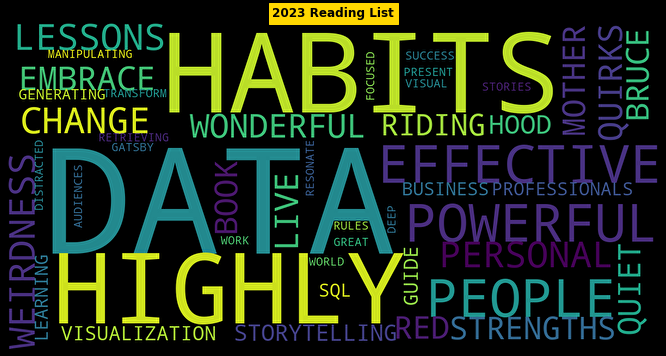

In [19]:
word_string=""

for book in BL23['Name']:
     word_string += book.upper() + " "

word_cloud = WordCloud(background_color='black',scale=3, normalize_plurals = True).generate_from_text(word_string)

plt.figure(figsize = (20,6), facecolor='black')
plt.imshow(word_cloud, interpolation = 'sinc')
# 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'
plt.axis('off')
plt.title("2023 Reading List", fontweight='bold', color='black', backgroundcolor='gold')

plt.show()

In [20]:
BL21['Year Read'] = 2021
BL22['Year Read'] = 2022
BL23['Year Read'] = 2023

In [21]:
comb_list = pd.concat([BL21, BL22, BL23]).sort_values(by='Name').set_index([pd.Index(range(1, len(BL21) + len(BL22) + len(BL23) + 1))])
comb_list

,Name,Author,Pages,Format,Year Read
1,A beginners guide to the stock market,Mathew R. Kratter,100,Ebook,2021
2,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook,2022
3,Atomic habits: an easy and proven way to build...,James Clear,298,Print,2021
4,Be Quiet! (Mother Bruce Book 3),Ryan T. Higgins,22,Ebook,2023
5,Credit spread options for beginners: turn your...,Freeman Publications,134,Ebook,2021
6,"Dear Girl, A celebration of wonderful, smart a...",Amy Krouse Rosenthal & Paris Rosenthal,40,Print,2022
7,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook,2023
8,"Heart sick: Connecting the dots between hope, ...",Conscious Core,107,Ebook,2021
9,How to win friends and influence people,Dale Carnegie,250,Print,2021
10,If you had controlling parents: How to make pe...,Dan Neuharth,274,Ebook,2022


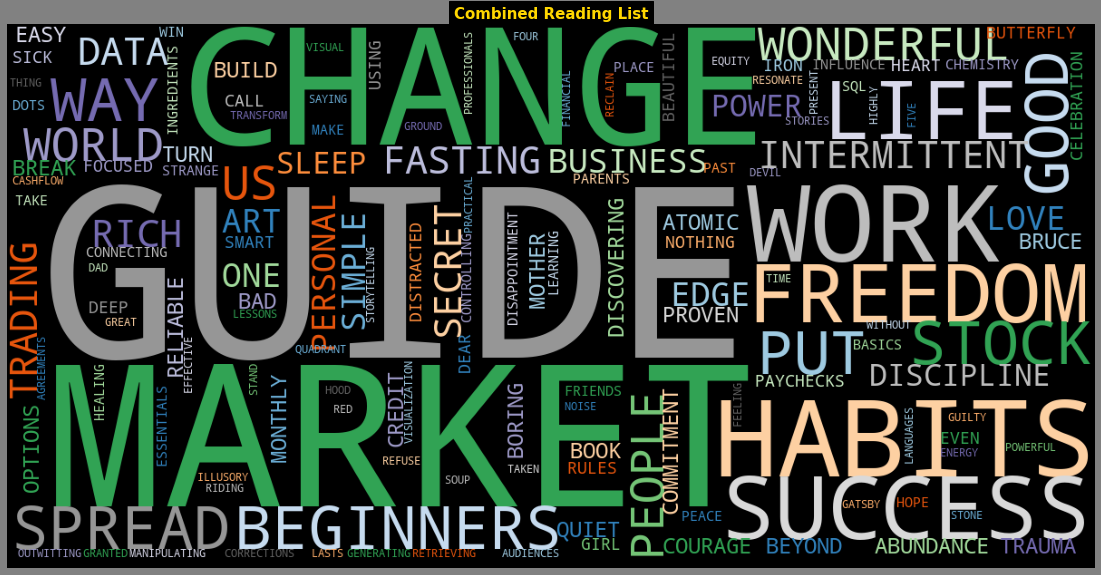

In [25]:
word_string=""

for book in comb_list['Name']:
     word_string += book.upper() + " "

word_cloud = WordCloud(background_color='black',scale=3, collocations=True, colormap='tab20c', normalize_plurals=True).generate_from_text(word_string)

plt.figure(figsize = (20,10), facecolor=(0,0,0,0.49))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Combined Reading List", fontweight='bold', color='gold', backgroundcolor='black', fontsize=15)

plt.show()

In [23]:
# Save file as CSV to create a power BI dashboard
labels = ['Short', 'Medium', 'Long']
bins = [0, 200, 280, 1000]
comb_list['Bin'] = pd.cut(comb_list['Pages'], bins=bins, labels=labels)
comb_list.to_csv('reading_list.csv', index=False)

comb_list.groupby(['Year Read', 'Bin']).agg({'Name': 'count', 'Pages': 'sum'}).rename(columns={'Name': 'Books Read', 'Pages': 'Pages Read'})


Books Read  Pages Read
Year Read Bin                           
2021      Short            7         674
          Medium           6        1420
          Long             5        1556
2022      Short            3         369
          Medium           4        1028
          Long             2         622
2023      Short            3         268
          Medium           2         488
          Long             4        1789

In [24]:
print('Key Words in Book Titles')
comb_list[comb_list['Name'].str.contains(
    'power| abundance| heal| habit| time| invest| change| grow| discipline| courage| work| learn'
    , case=False)]

Key Words in Book Titles


,Name,Author,Pages,Format,Year Read,Bin
2,Abundance beyond trauma: Discovering the coura...,Jeannine L. Rashidi,169,Ebook,2022,Short
3,Atomic habits: an easy and proven way to build...,James Clear,298,Print,2021,Long
7,Deep Work: Rules for focused success in a dist...,Cal Newport,287,Ebook,2023,Long
8,"Heart sick: Connecting the dots between hope, ...",Conscious Core,107,Ebook,2021,Short
12,Intermittent fasting basics: Your guide to the...,Lindsay Boyers,219,Print,2021,Medium
21,The 7 habits of highly effective people: Power...,Stephen R. Covey,556,Ebook,2023,Long
22,The art of saying NO: How to stand your ground...,Damon Zahariades,160,Ebook,2022,Short
28,The slight edge: Turning simple disciplines in...,Jeff Olson,280,Print,2021,Medium
30,Think and grow rich,Napoleon Hill,290,Ebook,2021,Long
32,Trading in the zone: master the market with co...,Mark Douglas,207,Print,2021,Medium
